### MLT Task #3
1.	Apply a Logistic Regression model using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule:
data: bioresponse.csv,
description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this dataset represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”).
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD (p.1) and SGD (p2) algorithms.
4.	For three modifications of gradient descent (pp. 1-3), plot learning curves (dependence of the value of the loss function on the iteration number).
5.	Train the models with different values of the learning rate (at least 5 different values of learning rate). Plot the learning curves for all these cases. How does it affect the accuracy of the model?

#### Import the libraries

In [ ]:
from sklearn.model_selection import  learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Explore the dataset

In [ ]:
#Load the dataset
df = pd.read_csv('bioresponse.csv', header=0)

In [ ]:
# Split the data into features and target
X = np.array(df.drop(columns=["Activity"]))
y = np.array(df["Activity"])

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Functions from Logistic Regression as a Neural Network – BP alg.ipynb
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.

    return w, b


def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        costs.append(float(cost))

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost[0]))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, optimization_algorithm=optimize):
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimization_algorithm(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Accuracy
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy  = 100 - np.mean(np.abs(Y_prediction_test  - Y_test)) * 100

    # Print train/test Errors
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy
        }

    return d

In [ ]:
#Train model with gradient descent (GD)
model_gd = model(X_train.T, y_train, X_test.T, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost=True, optimization_algorithm=optimize)

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\2346942792.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costs.append(float(cost))


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


### Implemention the stochastic gradient descent (SGD) method

In [ ]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost=False, batch_size=128):
    costs = []
    for i in range(num_iterations):

        m = X.shape[1]
        rand_idxs = np.random.choice(m, size=batch_size, replace=False)
        X_rand = X[:, rand_idxs]

        Y_rand = Y[rand_idxs]

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X_rand,Y_rand)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 10 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {round(float(cost), 7)}")

    params = {"w": w, "b": b}
    grads  = {"dw": dw, "db": db}

    return params, grads, costs

In [ ]:
#Train model with stochastic gradient descent (SGD)
model_sgd = model(X_train.T, y_train, X_test.T, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost=True, optimization_algorithm=optimize_sgd)

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\3957078940.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Cost after iteration {i}: {round(float(cost), 7)}")


Cost after iteration 0: 0.6931472
Cost after iteration 100: 0.6849746
Cost after iteration 200: 0.68271
Cost after iteration 300: 0.6681308
Cost after iteration 400: 0.6669245
Cost after iteration 500: 0.6507195
Cost after iteration 600: 0.6534663
Cost after iteration 700: 0.6599143
Cost after iteration 800: 0.6360526
Cost after iteration 900: 0.6152517
Cost after iteration 1000: 0.644349
Cost after iteration 1100: 0.6335751
Cost after iteration 1200: 0.6499451
Cost after iteration 1300: 0.6051339
Cost after iteration 1400: 0.6210952
Cost after iteration 1500: 0.6182717
Cost after iteration 1600: 0.6054574
Cost after iteration 1700: 0.6119748
Cost after iteration 1800: 0.6253238
Cost after iteration 1900: 0.5905325
train accuracy: 72.37824386775685 %
test accuracy: 72.38805970149254 %


### Implemention the Adam optimization method

In [ ]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False, beta1=0.9, beta2=0.999, epsilon=1e-8):

    costs = []

    # initialize the moments
    v_dw = np.zeros_like(w)
    s_dw = np.zeros_like(w)
    v_db = 0.0
    s_db = 0.0


    for t in range(1, num_iterations+1):
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        #first moment
        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        # second moment
        s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
        s_db = beta2 * s_db + (1 - beta2) * (db ** 2)

        # bias correction
        v_dw_corr = v_dw / (1 - beta1 ** t)
        v_db_corr = v_db / (1 - beta1 ** t)
        s_dw_corr = s_dw / (1 - beta2 ** t)
        s_db_corr = s_db / (1 - beta2 ** t)

        # undate rule
        w -= learning_rate * v_dw_corr / (np.sqrt(s_dw_corr) + epsilon)
        b -= learning_rate * v_db_corr / (np.sqrt(s_db_corr) + epsilon)


        # Record the costs
        costs.append(float(cost))

        # Print the cost every 100 training iterations
        if print_cost and t % 100 == 0:
            print ("Cost after iteration %i: %f" %(t, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
model_adam = model(X_train.T, y_train, X_test.T, y_test, num_iterations=2000,learning_rate=0.001, print_cost=True, optimization_algorithm=optimize_adam)

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\3088094956.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costs.append(float(cost))
C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\3088094956.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Cost after iteration %i: %f" %(t, cost))


Cost after iteration 100: 0.499318
Cost after iteration 200: 0.440265
Cost after iteration 300: 0.406813
Cost after iteration 400: 0.383699
Cost after iteration 500: 0.366060
Cost after iteration 600: 0.351788
Cost after iteration 700: 0.339790
Cost after iteration 800: 0.329430
Cost after iteration 900: 0.320303
Cost after iteration 1000: 0.312140
Cost after iteration 1100: 0.304751
Cost after iteration 1200: 0.298000
Cost after iteration 1300: 0.291782
Cost after iteration 1400: 0.286019
Cost after iteration 1500: 0.280646
Cost after iteration 1600: 0.275612
Cost after iteration 1700: 0.270877
Cost after iteration 1800: 0.266405
Cost after iteration 1900: 0.262169
Cost after iteration 2000: 0.258144
train accuracy: 89.93956629932457 %
test accuracy: 75.5863539445629 %


### Comparing the accuracy of the model fitted using Adam optimization with the models trained by the classic GD and SGD algorithms

In [ ]:
accuracy_name = ['Train accuracy', 'Test accuracy']
accuracy_table = pd.DataFrame({     '': accuracy_name,
                                    'GD': [model_gd["train_accuracy"], model_gd["test_accuracy"]],
                                    'SGD': [model_sgd["train_accuracy"], model_sgd["test_accuracy"]],
                                    'Adam': [model_adam["train_accuracy"], model_adam["test_accuracy"]]})
accuracy_table

,,GD,SGD,Adam
0,Train accuracy,72.520441,71.987202,89.939566
1,Test accuracy,72.707889,72.388060,75.586354


* Adam shows a much higher accuracy on the train sample.
* However, Adam’s test accuracy is only 2-3% higher, despite the huge increase on train.
* It is a sign of easy overfitting

### Learning curves for three modifications of gradient descent

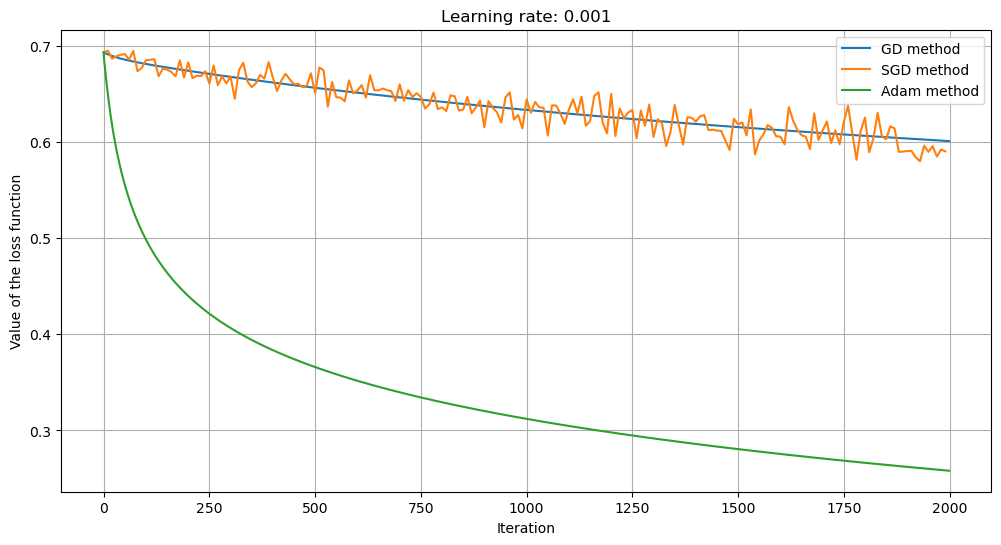

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(model_gd["costs"], label='GD method')

# SGD records the cost at every 10 steps, unlike other models
sgd_x = np.arange(len(model_sgd["costs"])) * 10
plt.plot(sgd_x, model_sgd["costs"], label='SGD method')

plt.plot(model_adam["costs"], label='Adam method')

plt.xlabel("Iteration", fontsize=10)
plt.ylabel("Value of the loss function", fontsize=10)
plt.title(f'Learning rate: {0.001}')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### Train the models with different values of the learning rate (at least 5 different values of learning rate). Plot the learning curves for all these cases. How does it affect the accuracy of the model?

In [ ]:
learning_rates = [1e-5, 1e-4, 5e-4, 1e-3, 4e-3]

algorithms = {
    "GD": optimize,
    "SGD": optimize_sgd,
    "Adam": optimize_adam
}

In [ ]:
results = {}

for name, algo in algorithms.items():
    print(f"\n=== {name} ===")
    results[name] = {}

    for lr in learning_rates:
        print(f"  learning rate = {lr}")
        model_res = model(
            X_train.T, y_train,
            X_test.T,  y_test,
            num_iterations=2000,
            learning_rate=lr,
            optimization_algorithm=algo,
            print_cost=False
        )
        results[name][lr] = model_res


=== GD ===
  learning rate = 1e-05


C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\2346942792.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costs.append(float(cost))


train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
  learning rate = 0.0001
train accuracy: 57.625311055812304 %
test accuracy: 60.66098081023454 %
  learning rate = 0.0005
train accuracy: 67.7568432278706 %
test accuracy: 69.40298507462687 %
  learning rate = 0.001
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %
  learning rate = 0.004
train accuracy: 76.18201208674014 %
test accuracy: 74.09381663113007 %

=== SGD ===
  learning rate = 1e-05
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
  learning rate = 0.0001
train accuracy: 57.80305723426946 %
test accuracy: 61.08742004264393 %
  learning rate = 0.0005
train accuracy: 67.40135087095626 %
test accuracy: 69.7228144989339 %
  learning rate = 0.001
train accuracy: 72.555990046214 %
test accuracy: 72.92110874200426 %
  learning rate = 0.004
train accuracy: 76.18201208674014 %
test accuracy: 74.30703624733476 %

=== Adam ===
  learning rate = 1e-05


C:\Users\Екатерина\AppData\Local\Temp\ipykernel_16800\3088094956.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costs.append(float(cost))


train accuracy: 71.0273729114824 %
test accuracy: 70.8955223880597 %
  learning rate = 0.0001
train accuracy: 81.90543903306079 %
test accuracy: 76.11940298507463 %
  learning rate = 0.0005
train accuracy: 87.59331674369001 %
test accuracy: 76.33262260127933 %
  learning rate = 0.001
train accuracy: 89.93956629932457 %
test accuracy: 75.5863539445629 %
  learning rate = 0.004
train accuracy: 93.53003910415926 %
test accuracy: 73.98720682302772 %


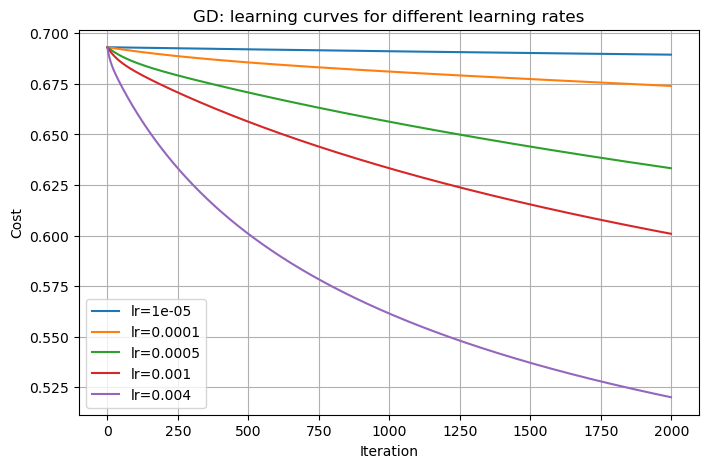

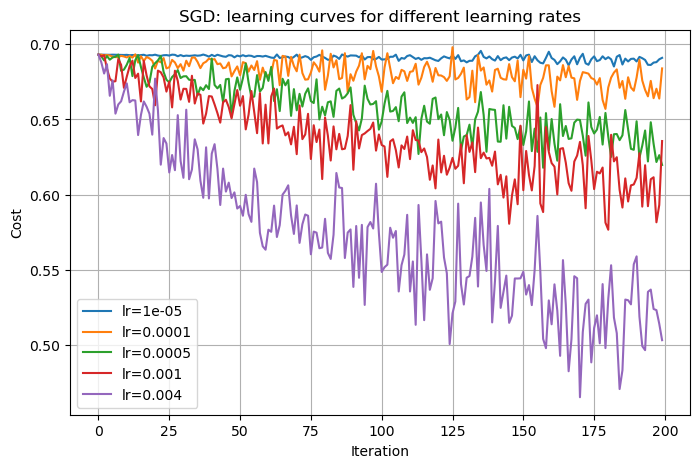

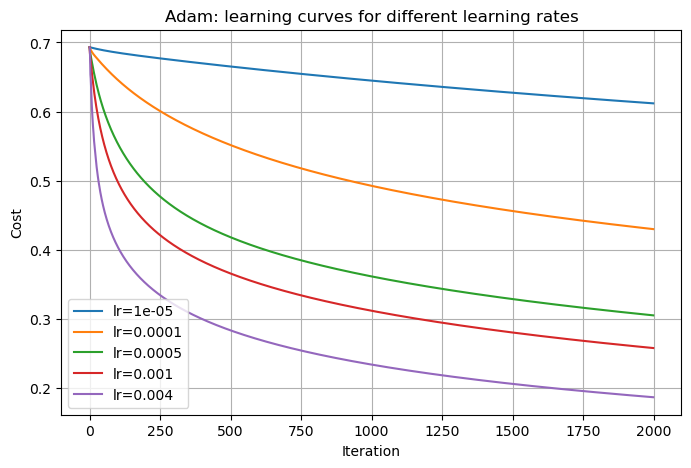

In [ ]:
for name in algorithms.keys():
    plt.figure(figsize=(8, 5))
    for lr in learning_rates:
        costs = results[name][lr]["costs"]
        plt.plot(costs, label=f"lr={lr}")
    plt.title(f"{name}: learning curves for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
methods = ["GD", "SGD", "Adam"]
metrics = ["Train accuracy", "Test accuracy"]

rows = []

for method in methods:
    for metric in metrics:
        row = {"Method": method, "Metric": metric}

        for lr in learning_rates:
            key = "train_accuracy" if metric == "Train accuracy" else "test_accuracy"
            row[lr] = results[method][lr][key]

        rows.append(row)

final_df = pd.DataFrame(rows)
final_df

,Method,Metric,0.00001,0.0001,0.0005,0.001,0.004
0,GD,Train accuracy,53.288304,57.625311,67.756843,72.520441,76.182012
1,GD,Test accuracy,57.036247,60.660981,69.402985,72.707889,74.093817
2,SGD,Train accuracy,53.288304,57.803057,67.401351,72.555990,76.182012
3,SGD,Test accuracy,57.036247,61.087420,69.722814,72.921109,74.307036
4,Adam,Train accuracy,71.027373,81.905439,87.593317,89.939566,93.530039
5,Adam,Test accuracy,70.895522,76.119403,76.332623,75.586354,73.987207


* Adam is much less sensitive to learning rate than GD and SGD
* Adam showed better accuracy on train and test samples, especially with learning rate = 0.001.
* GD and SGD work much worse with low learning rate.
* Observed a slight overfitting of Adam